In [1]:
import os
%pwd

'd:\\ML-Projects\\03-Air-Quality-Index-Predictor\\research'

In [2]:
os.chdir("../")
%pwd

'd:\\ML-Projects\\03-Air-Quality-Index-Predictor'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from sklearn.metrics import mean_squared_error, mean_absolute_error
from itertools import product
# from xgboost import XGBRegressor

# # Plotting function
# def plot_forecasts(train, test, predictions, title):
#     plt.figure(figsize=(12, 6))
#     plt.plot(train.index, train.values, label='Train')
#     plt.plot(test.index, test.values, label='Test')
#     plt.plot(test.index, predictions, label='Predictions', color='red', linestyle='--')
#     plt.title(title)
#     plt.xlabel('Date')
#     plt.ylabel('Values')
#     plt.legend()
#     plt.show()

# # Evaluation function
# def evaluate_forecast(actual, predicted):
#     rmse = np.sqrt(mean_squared_error(actual, predicted))
#     mae = mean_absolute_error(actual, predicted)
#     return rmse, mae

# # Exponential Smoothing (ETS)
# def ets_forecast(train, test, seasonal='add', seasonal_periods=12):
#     model = ExponentialSmoothing(train, trend='add', seasonal=seasonal, seasonal_periods=seasonal_periods)
#     model_fit = model.fit()
#     forecast = model_fit.forecast(steps=len(test))
#     return forecast

# # ARIMA
# def arima_forecast(train, test, order=(5,1,0)):
#     model = ARIMA(train, order=order)
#     model_fit = model.fit()
#     forecast = model_fit.forecast(steps=len(test))
#     return forecast

# # SARIMA
# def sarima_forecast(train, test, order=(1,1,1), seasonal_order=(1,1,1,12)):
#     model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
#     forecast = model_fit.forecast(steps=len(test))
#     return forecast

# # Prophet
# def prophet_forecast(train, test):
#     df = train.reset_index()
#     df.columns = ['ds', 'y']
#     model = Prophet()
#     model.fit(df)
#     future = model.make_future_dataframe(periods=len(test))
#     forecast = model.predict(future)
#     return forecast['yhat'][-len(test):].values

# # LSTM
# def lstm_forecast(train, test, look_back=1, epochs=20, batch_size=1):
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
#     test_scaled = scaler.transform(test.values.reshape(-1, 1))

#     def create_dataset(dataset, look_back=1):
#         X, Y = [], []
#         for i in range(len(dataset) - look_back - 1):
#             a = dataset[i:(i + look_back), 0]
#             X.append(a)
#             Y.append(dataset[i + look_back, 0])
#         return np.array(X), np.array(Y)
    
#     trainX, trainY = create_dataset(train_scaled, look_back)
#     testX, testY = create_dataset(test_scaled, look_back)
#     trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#     testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
#     model = Sequential()
#     model.add(LSTM(4, input_shape=(1, look_back)))
#     model.add(Dense(1))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=2)
    
#     testPredict = model.predict(testX)
#     testPredict = scaler.inverse_transform(testPredict)
#     return testPredict.flatten()

# # XGBoost
# def xgboost_forecast(train, test, look_back=1):
#     def create_dataset(dataset, look_back=1):
#         X, Y = [], []
#         for i in range(len(dataset) - look_back):
#             X.append(dataset[i:(i + look_back)])
#             Y.append(dataset[i + look_back])
#         return np.array(X), np.array(Y)
    
#     trainX, trainY = create_dataset(train.values, look_back)
#     testX, testY = create_dataset(test.values, look_back)
    
#     model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
#     model.fit(trainX, trainY)
    
#     testPredict = model.predict(testX)
#     return testPredict

# # City forecasting with plotting
# def city_forecasting_with_plot(city, train, test, model_func, plot=True, **kwargs):
#     train_city = train[train['city'] == city]
#     test_city = test[test['city'] == city]
    
#     train_city.set_index('date', inplace=True)
#     test_city.set_index('date', inplace=True)
    
#     train_values = train_city.drop(columns=['city'])
#     test_values = test_city.drop(columns=['city'])
    
#     forecasts = {}
#     metrics = {}
#     for col in train_values.columns:
#         train_series = train_city[col]
#         test_series = test_city[col]
        
#         forecast = model_func(train_series, test_series, **kwargs)
#         forecasts[col] = forecast
        
#         rmse, mae = evaluate_forecast(test_series, forecast)
#         metrics[col] = {'RMSE': rmse, 'MAE': mae}
        
#         if plot:
#             plot_forecasts(train_series, test_series, forecast, title=f'{city} - {col}')
    
#     return forecasts, metrics

# # Load data
# train_data = pd.read_csv('/mnt/data/train_dataset.csv', parse_dates=['date'])
# test_data = pd.read_csv('/mnt/data/test_dataset.csv', parse_dates=['date'])

# # Ensure 'date' is set as the index
# train_data.set_index('date', inplace=True)
# test_data.set_index('date', inplace=True)

# # Example: Testing Exponential Smoothing on a city
# ets_forecasts, ets_metrics = city_forecasting_with_plot('Ahmedabad', train_data, test_data, ets_forecast, seasonal='add', seasonal_periods=12)
# print("ETS Metrics for Ahmedabad:", ets_metrics)

# # Example: Testing Exponential Smoothing on another city
# ets_forecasts, ets_metrics = city_forecasting_with_plot('Delhi', train_data, test_data, ets_forecast, seasonal='add', seasonal_periods=12)
# print("ETS Metrics for Delhi:", ets_metrics)


In [4]:
train_data = pd.read_csv(r"artifacts\data_transformation\train_dataset.csv", parse_dates=['date'])
test_data = pd.read_csv(r"artifacts\data_transformation\test_dataset.csv", parse_dates=['date'])


In [21]:
def plot_forecasts(train, test, predictions, title):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train.values, label='Train')
    plt.plot(test.index, test.values, label='Test')
    plt.plot(test.index, predictions, label='Predictions', color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

def evaluate_forecast(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    return rmse, mae

def city_forecasting_with_plot(city, train, test, model_func, plot=True, **kwargs):
    train_city = train[train['city'] == city]
    test_city = test[test['city'] == city]
    
    train_city.set_index('date', inplace=True)
    test_city.set_index('date', inplace=True)
    
    # Set the frequency explicitly to weekly ('W')
    train_city = train_city.asfreq('W')
    test_city = test_city.asfreq('W')
    
    train_series = train_city['AQI_calculated']
    test_series = test_city['AQI_calculated']
    
    forecast = model_func(train_series, test_series, **kwargs)
    if forecast is None:
        print(f"Warning: Forecast for AQI_calculated is None")
        return {}, {}
    
    forecasts = {'AQI_calculated': forecast}
    
    try:
        rmse, mae = evaluate_forecast(test_series, forecast)
        metrics = {'AQI_calculated': {'RMSE': rmse, 'MAE': mae}}
    except Exception as e:
        print(f"Error in evaluating forecast for AQI_calculated: {e}")
        return {}, {}
    
    if plot:
        plot_forecasts(train_series, test_series, forecast, title=f'{city} - AQI_calculated')
    
    return forecasts, metrics


## 1. Exponential Smoothing

In [22]:
# Exponential Smoothing (ETS)
def ets_forecast(train, test, seasonal='add', seasonal_periods=12):
    model = ExponentialSmoothing(train, trend='add', seasonal=seasonal, seasonal_periods=seasonal_periods)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return forecast

Forecasting for Delhi using Exponential Smoothing (ETS)


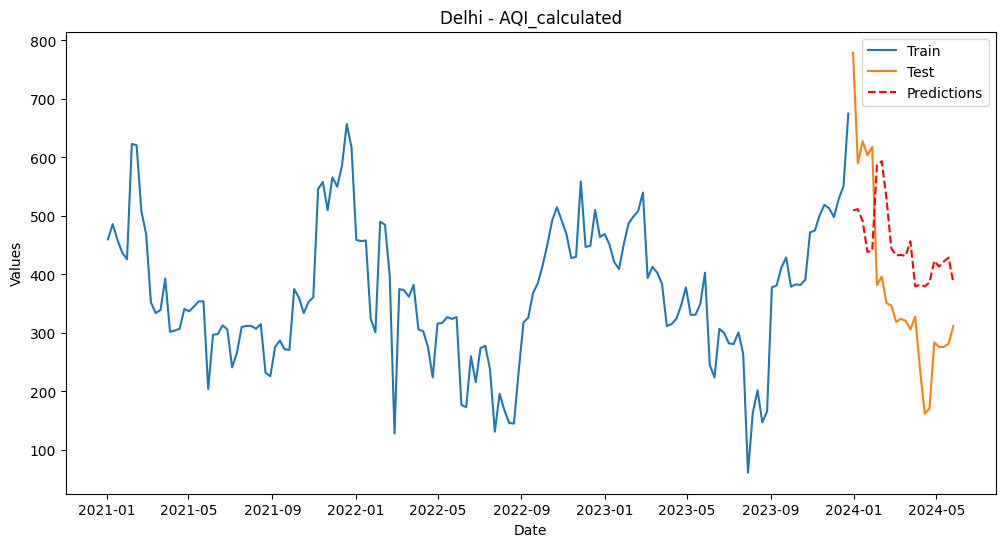

ETS Metrics: {'AQI_calculated': {'RMSE': 156.98745562961327, 'MAE': 148.2681996805262}}


In [23]:

# City to forecast
city_name = 'Delhi'

# Exponential Smoothing (ETS) Forecast
print(f"Forecasting for {city_name} using Exponential Smoothing (ETS)")
ets_forecasts, ets_metrics = city_forecasting_with_plot(city_name, train_data, test_data, ets_forecast, seasonal='add', seasonal_periods=52)
print("ETS Metrics:", ets_metrics)




### Improved

In [24]:
def ets_forecast_updated(train, test):
    param_grid = {
        'trend': ['add', 'mul', None],
        'seasonal': ['add', 'mul', None],
        'seasonal_periods': [12, 52]  # Adjust as needed
    }
    
    best_score = float('inf')
    best_params = None
    best_forecast = None
    
    # Check if train data is strictly positive
    is_positive = np.all(train > 0)
    
    for trend, seasonal, seasonal_periods in product(param_grid['trend'], param_grid['seasonal'], param_grid['seasonal_periods']):
        if not is_positive and (trend == 'mul' or seasonal == 'mul'):
            print(f"Skipping combination trend={trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods} due to non-positive values in the data")
            continue
        
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=RuntimeWarning)
                warnings.simplefilter("ignore", category=ConvergenceWarning)
                
                # Clipping the train data to avoid extreme values causing overflow
                clipped_train = train.clip(lower=-1e10, upper=1e10)
                
                model = ExponentialSmoothing(clipped_train, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=len(test))
                score = mean_squared_error(test, forecast)
                
                if score < best_score:
                    best_score = score
                    best_params = {'trend': trend, 'seasonal': seasonal, 'seasonal_periods': seasonal_periods}
                    best_forecast = forecast
        except Exception as e:
            print(f"Error fitting model with trend={trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods}: {e}")
            continue
    
    print(f"Best Parameters: {best_params}")
    return best_forecast


Forecasting for Delhi using Exponential Smoothing (ETS)
Best Parameters: {'trend': None, 'seasonal': 'add', 'seasonal_periods': 52}


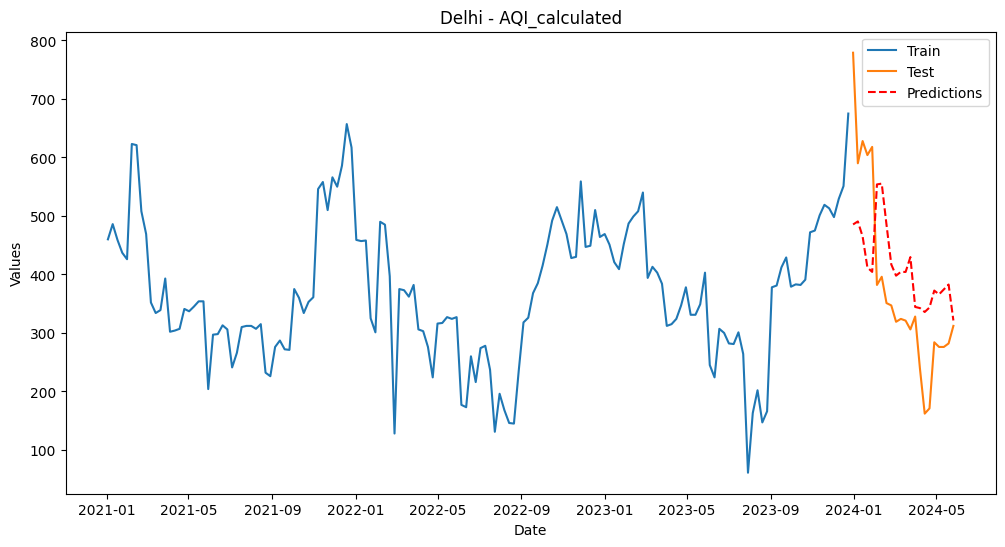

ETS Metrics: {'AQI_calculated': {'RMSE': 138.93499187324008, 'MAE': 123.45766815427235}}


In [25]:

# City to forecast
city_name = 'Delhi'

# Exponential Smoothing (ETS) Forecast
print(f"Forecasting for {city_name} using Exponential Smoothing (ETS)")
ets_forecasts, ets_metrics = city_forecasting_with_plot(city_name, train_data, test_data, ets_forecast_updated)
print("ETS Metrics:", ets_metrics)


## 2. Arima

In [26]:
# ARIMA
def arima_forecast(train, test, order=(5,1,0)):
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return forecast

Forecasting for Delhi using Exponential Smoothing (ETS)


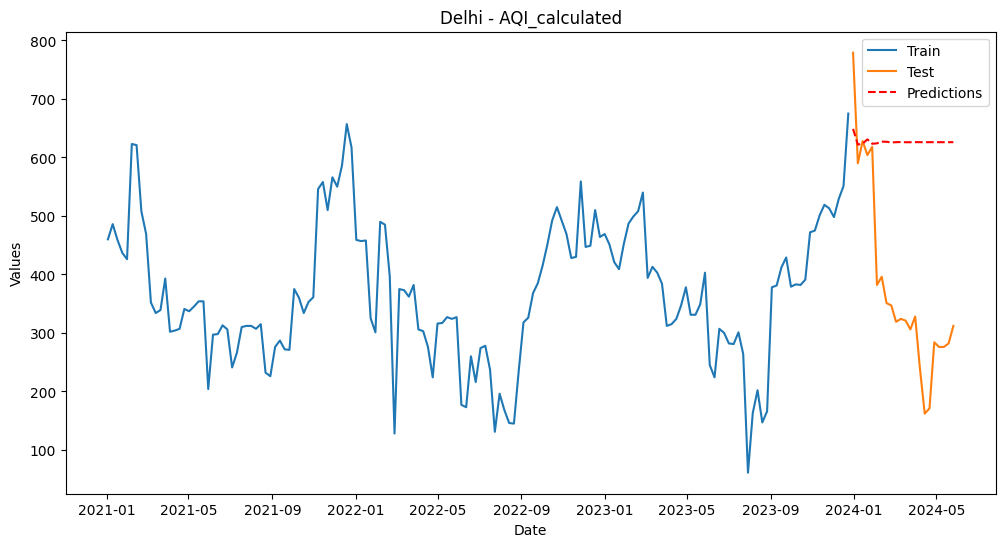

ETS Metrics: {'AQI_calculated': {'RMSE': 294.3157035785221, 'MAE': 262.05673808308387}}


In [27]:
# City to forecast
city_name = 'Delhi'

# Exponential Smoothing (ETS) Forecast
print(f"Forecasting for {city_name} using Exponential Smoothing (ETS)")
ets_forecasts, ets_metrics = city_forecasting_with_plot(city_name, train_data, test_data, arima_forecast)
print("ETS Metrics:", ets_metrics)

In [28]:
def arima_forecast_updated(train, test):
    p = range(0, 6)
    d = range(0, 3)
    q = range(0, 6)
    pdq = list(product(p, d, q))

    best_score = float('inf')
    best_params = None
    best_forecast = None

    for params in pdq:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                model = ARIMA(train, order=params)
                model_fit = model.fit()
                forecast = model_fit.forecast(steps=len(test))
                score = mean_squared_error(test, forecast)
                
                if score < best_score:
                    best_score = score
                    best_params = params
                    best_forecast = forecast
        except Exception as e:
            continue

    print(f"Best Parameters: {best_params}")
    return best_forecast

Forecasting for Delhi using Exponential Smoothing (ETS)
Best Parameters: (3, 0, 4)


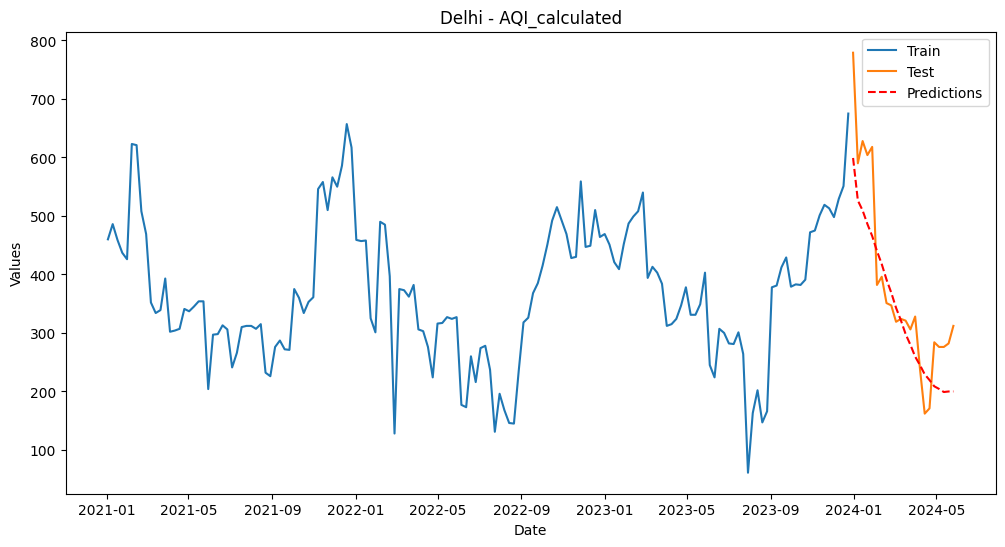

ETS Metrics: {'AQI_calculated': {'RMSE': 80.612035808917, 'MAE': 66.26149842073212}}


In [29]:
# City to forecast
city_name = 'Delhi'

# Exponential Smoothing (ETS) Forecast
print(f"Forecasting for {city_name} using Exponential Smoothing (ETS)")
ets_forecasts, ets_metrics = city_forecasting_with_plot(city_name, train_data, test_data, arima_forecast_updated)
print("ETS Metrics:", ets_metrics)